In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [109]:
IMG_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [71]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory="./dataset",
    label_mode='int',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
)

Found 2152 files belonging to 3 classes.


In [72]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

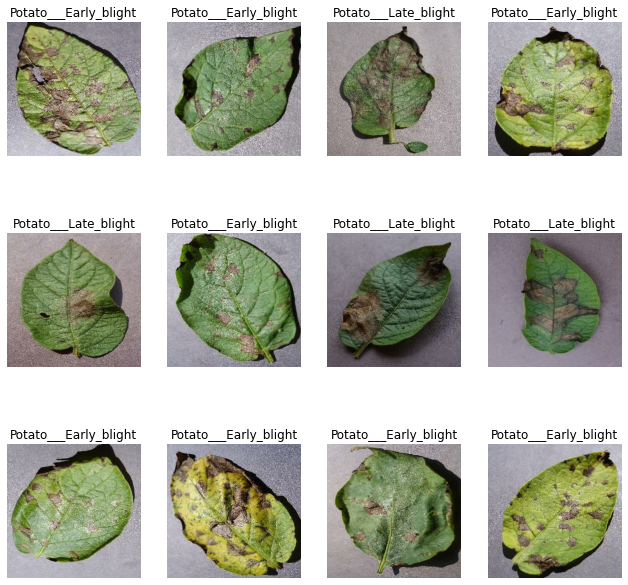

In [73]:
plt.figure(figsize=(11, 11))
for img_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.title(class_names[label_batch[i]])
        plt.imshow(img_batch[i].numpy().astype("uint8"))
        plt.axis("off")


In [74]:
def get_train_val_test_ds(dataset, train_split=0.8, val_split=0.1, test_split=0.1, buffer_size=1000):
    dataset = dataset.shuffle(buffer_size, seed=0)
    dataset_size = len(dataset)
    train_size = int(dataset_size*train_split)
    val_size = int(dataset_size*val_split)
    test_size = int(dataset_size*test_split)
    
    ds_train = dataset.take(train_size)
    ds_val = dataset.skip(train_size).take(val_size)
    ds_test = dataset.skip(train_size).skip(val_size)
    
    return ds_train, ds_val, ds_test

In [75]:
ds_train, ds_val, ds_test = get_train_val_test_ds(dataset)
ds_train = ds_train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
ds_val = ds_val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
ds_test = ds_test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [99]:
input_shape = (IMG_SIZE, IMG_SIZE, CHANNELS)
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE, input_shape=input_shape),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
])

In [100]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [101]:
model = tf.keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax'),
])

In [102]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_17 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 sequential_18 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                

In [103]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [104]:
history = model.fit(
    ds_train,
    batch_size=BATCH_SIZE,
    validation_data=ds_val,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/50
54/54 [==============================] - 128s 2s/step - loss: 0.8842 - accuracy: 0.5264 - val_loss: 0.8488 - val_accuracy: 0.5625
Epoch 2/50
54/54 [==============================] - 104s 2s/step - loss: 0.6824 - accuracy: 0.6725 - val_loss: 0.7139 - val_accuracy: 0.6146
Epoch 3/50
54/54 [==============================] - 112s 2s/step - loss: 0.4919 - accuracy: 0.7811 - val_loss: 0.4069 - val_accuracy: 0.8281
Epoch 4/50
54/54 [==============================] - 111s 2s/step - loss: 0.3484 - accuracy: 0.8550 - val_loss: 0.2669 - val_accuracy: 0.9062
Epoch 5/50
54/54 [==============================] - 101s 2s/step - loss: 0.3325 - accuracy: 0.8592 - val_loss: 0.3938 - val_accuracy: 0.8646
Epoch 6/50
54/54 [==============================] - 90s 2s/step - loss: 0.2324 - accuracy: 0.9155 - val_loss: 0.1813 - val_accuracy: 0.9167
Epoch 7/50
54/54 [==============================] - 88s 2s/step - loss: 0.1503 - accuracy: 0.9437 - val_loss: 0.1630 - val_accuracy: 0.9219
Epoch 8/50
54/5

In [105]:
model.evaluate(ds_test)

8/8 [==============================] - 6s 484ms/step - loss: 0.0160 - accuracy: 0.9957


[0.016048774123191833, 0.9956896305084229]

In [107]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

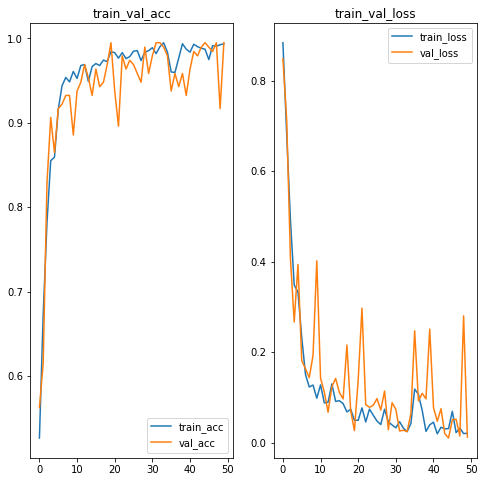

In [116]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), train_acc, label='train_acc')
plt.plot(range(EPOCHS), val_acc, label='val_acc')
plt.legend(loc='lower right')
plt.title('train_val_acc')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), train_loss, label='train_loss')
plt.plot(range(EPOCHS), val_loss, label='val_loss')
plt.legend(loc='upper right')
plt.title('train_val_loss')
plt.show()

In [200]:
def predict(model, img_batch):
    preds_probs = model.predict(img_batch)
    preds_labels = np.argmax(preds_probs, axis=1)
    preds_conf = np.max(preds_probs, axis=1)*100
    preds_conf = [round(float(i), 2) for i in preds_conf]
    return preds_probs, preds_conf, preds_labels

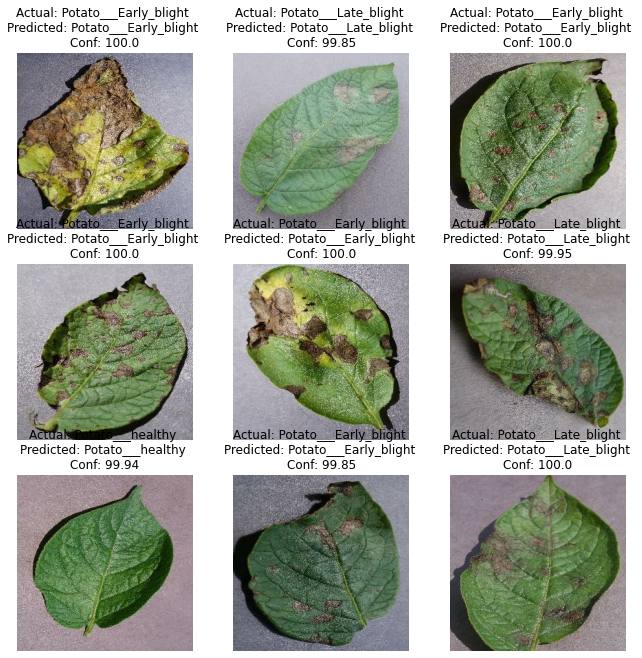

In [203]:
plt.figure(figsize=(11, 11))
for img_batch, label_batch in ds_test.take(1):
    preds_probs, preds_conf, preds_labels = predict(model, img_batch)
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        title = f"Actual: {class_names[label_batch[i]]} \nPredicted: {class_names[preds_labels[i]]} \nConf: {preds_conf[i]}"
        plt.title(title)
        plt.imshow(img_batch[i].numpy().astype("uint8"))
        plt.axis("off")

In [208]:
version = 1
model.save(f"saved_models/{version}")

INFO:tensorflow:Assets written to: saved_models/saved_model1\assets


In [3]:
__model = None

def load_saved_model():
    global __model
    model_path = "./saved_models/saved_model1"
    __model = tf.keras.models.load_model(model_path)
    print("Loaded saved_model.")
load_saved_model()

Loaded saved_model.
